In [1]:

from catmatch.cnn.utils.nn_manager import NNManager
from catmatch.cnn.dataloaders.catbreeds import create_catbreed_dataloader
from catmatch.cnn.models.vgg import VGG16

import torch
import matplotlib.pyplot as plt
import torchvision.transforms as T
import torchvision.transforms.functional as TF

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.manual_seed(124)
epochs = 10
batch_size = 32
learning_rate = 1e-3  # 0.005 * batch_size / 256 
early_stop_count = 30
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print("Device: ", device)
#class_to_idx_map = {'Abyssinian': 0, 'American Bobtail': 1, 'American Shorthair': 2, 'Bengal': 3, 'Birman': 4, 'Bombay': 5, 'British Shorthair': 6, 'Egyptian Mau': 7, 'Maine Coon': 8, 'Persian': 9, 'Ragdoll': 10, 'Russian Blue': 11, 'Siamese': 12, 'Sphynx': 13, 'Tuxedo': 14}
transforms = T.Compose([
    T.Resize((224, 224)),
])
train, val, test = create_catbreed_dataloader(img_dir='./.data/', batch_size=batch_size, transform=transforms)
print("train len", len(train))
print("DAtaset created")
model = VGG16(num_classes=15)
model.cuda()
nn_manager = NNManager(
    batch_size, learning_rate, early_stop_count, epochs, model, (train, val, test)
)
nn_manager.train()

dic {'Abyssinian': 0, 'American Bobtail': 1, 'American Shorthair': 2, 'Bengal': 3, 'Birman': 4, 'Bombay': 5, 'British Shorthair': 6, 'Egyptian Mau': 7, 'Maine Coon': 8, 'Persian': 9, 'Ragdoll': 10, 'Russian Blue': 11, 'Siamese': 12, 'Sphynx': 13, 'Tuxedo': 14}
train len 141
DAtaset created
VGG16(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU

  0%|          | 0/141 [00:00<?, ?it/s]c:\Users\ugioh\code\catmatch\.venv\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
 49%|████▉     | 69/141 [15:58<14:15, 11.88s/it]  

Epoch: 0, Batches per seconds: 0.07, Global step:     70, Validation Loss: 2.68, Validation Accuracy: 0.089


 99%|█████████▊| 139/141 [32:04<00:26, 13.35s/it]

Epoch: 0, Batches per seconds: 0.07, Global step:    140, Validation Loss: 2.67, Validation Accuracy: 0.108


100%|██████████| 141/141 [34:00<00:00, 14.47s/it]


---- Epoch 2 of 10 ----


 48%|████▊     | 68/141 [10:35<11:17,  9.27s/it]

Epoch: 1, Batches per seconds: 0.08, Global step:    210, Validation Loss: 2.68, Validation Accuracy: 0.085


 98%|█████████▊| 138/141 [22:11<00:28,  9.36s/it]

Epoch: 1, Batches per seconds: 0.08, Global step:    280, Validation Loss: 2.69, Validation Accuracy: 0.066


100%|██████████| 141/141 [23:19<00:00,  9.92s/it]


---- Epoch 3 of 10 ----


  1%|▏         | 2/141 [00:28<32:30, 14.03s/it]


KeyboardInterrupt: 

In [4]:
nn_manager.load_best_model()
nn_manager.test()

100%|██████████| 18/18 [00:38<00:00,  2.16s/it]


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.03      0.06      0.04        35
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        42
           5       0.15      0.45      0.23        40
           6       0.14      0.07      0.10        41
           7       0.07      0.20      0.11        41
           8       0.00      0.00      0.00        44
           9       0.00      0.00      0.00        30
          10       0.00      0.00      0.00        36
          11       0.00      0.00      0.00        46
          12       0.06      0.58      0.11        24
          13       0.00      0.00      0.00        44
          14       0.00      0.00      0.00        28

    accuracy                           0.08       562
   macro avg       0.03      0.09      0.04       562
wei

c:\Users\ugioh\code\catmatch\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ugioh\code\catmatch\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ugioh\code\catmatch\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0800711743772242

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11


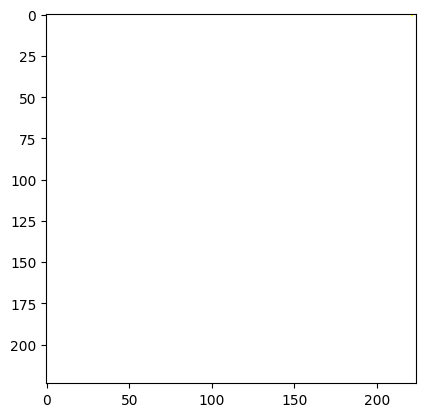

In [ ]:
import numpy as np
sample1, label1 = test.dataset[8]
sample2, label2 = test.dataset[10]
sample3, label3 = test.dataset[19]
print(label1)
plt.imshow(np.transpose(sample1, (2, 1, 0)))


12


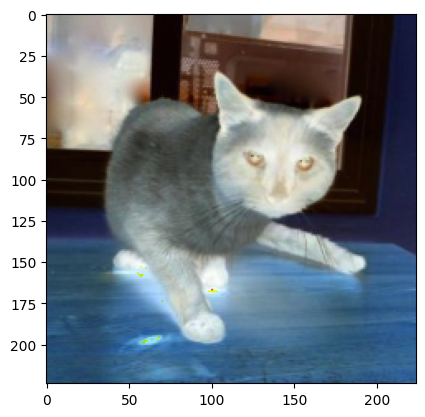

In [ ]:

print(label2)
plt.imshow(T.ToPILImage()(sample2))

13


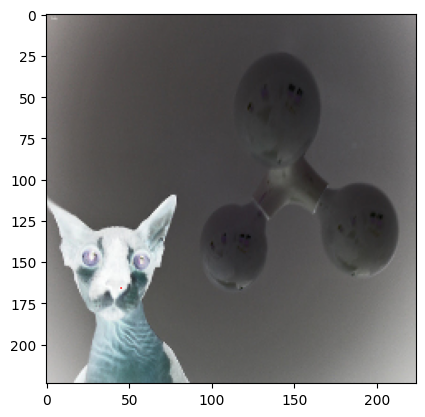

In [ ]:
print(label3)
plt.imshow(T.ToPILImage()(sample3))

In [ ]:
print(model(sample1))

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor